In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from matplotlib.colors import ListedColormap
from math import pi
import numpy as np

In [69]:
df = pd.read_csv("athlete_events.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [70]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [71]:
# Remove all the rows contain NAN
df.dropna(inplace = True)

In [72]:
gold_df = df.query("`Medal`== 'Gold'")

In [73]:
# Top 10 Competitive Nations
medals_by_country = df.groupby('NOC')['Medal'].count().sort_values(ascending=False)
top_10_countries = medals_by_country.head(10)
top_10_countries_noc = top_10_countries.index.tolist()
top_10_countries_noc

['USA', 'URS', 'GER', 'AUS', 'RUS', 'ITA', 'CAN', 'GBR', 'GDR', 'FRA']

In [74]:
# Top 10 Competitive Sports
medals_by_sport = df.groupby('Sport')['Medal'].count().sort_values(ascending=False)
top_10_sports = medals_by_sport.head(10)
top_10_sports_noc = top_10_sports.index.tolist()
top_10_sports_noc

['Athletics',
 'Swimming',
 'Rowing',
 'Ice Hockey',
 'Hockey',
 'Gymnastics',
 'Fencing',
 'Football',
 'Canoeing',
 'Basketball']

In [154]:
nation_df = gold_df[['Sport', 'NOC', 'Medal']]
nation_df = nation_df[nation_df['NOC'].isin(top_10_countries_noc)]
nation_df = nation_df[nation_df['Sport'].isin(top_10_sports_noc)]
medal_count = nation_df.groupby(["Sport","NOC"])["Medal"].count()
medal_count_df = medal_count.unstack().fillna(0)
df_percentage = medal_count_df.div(medal_count_df.sum(axis=1), axis=0) * 100

In [155]:
bio_data = gold_df[['Height', 'Weight', 'Sex','Age']]

height_bins = np.arange(155, 200, 5) 
weight_bins = np.arange(45, 100, 5)   

heatmap_data = bio_data .groupby(['Sex', pd.cut(bio_data ['Height'], height_bins), pd.cut(bio_data['Weight'], weight_bins)]).size().unstack()

In [156]:
gender_gold_medals = gold_df.groupby(['Sport', 'Sex'])['Medal'].count().reset_index()


total_gold_medals_by_sport = gender_gold_medals.groupby('Sport')['Medal'].transform('sum')
gender_gold_medals['Ratio'] = gender_gold_medals['Medal'] / total_gold_medals_by_sport


male_ratio = gender_gold_medals[gender_gold_medals['Sex'] == 'M'].set_index('Sport')['Ratio']
female_ratio = gender_gold_medals[gender_gold_medals['Sex'] == 'F'].set_index('Sport')['Ratio']


categories = list(male_ratio.index)
N = len(categories)

values_male = male_ratio.values.flatten().tolist()
values_female = female_ratio.values.flatten().tolist()

values_male += values_male[:1]
values_female += values_female[:1]

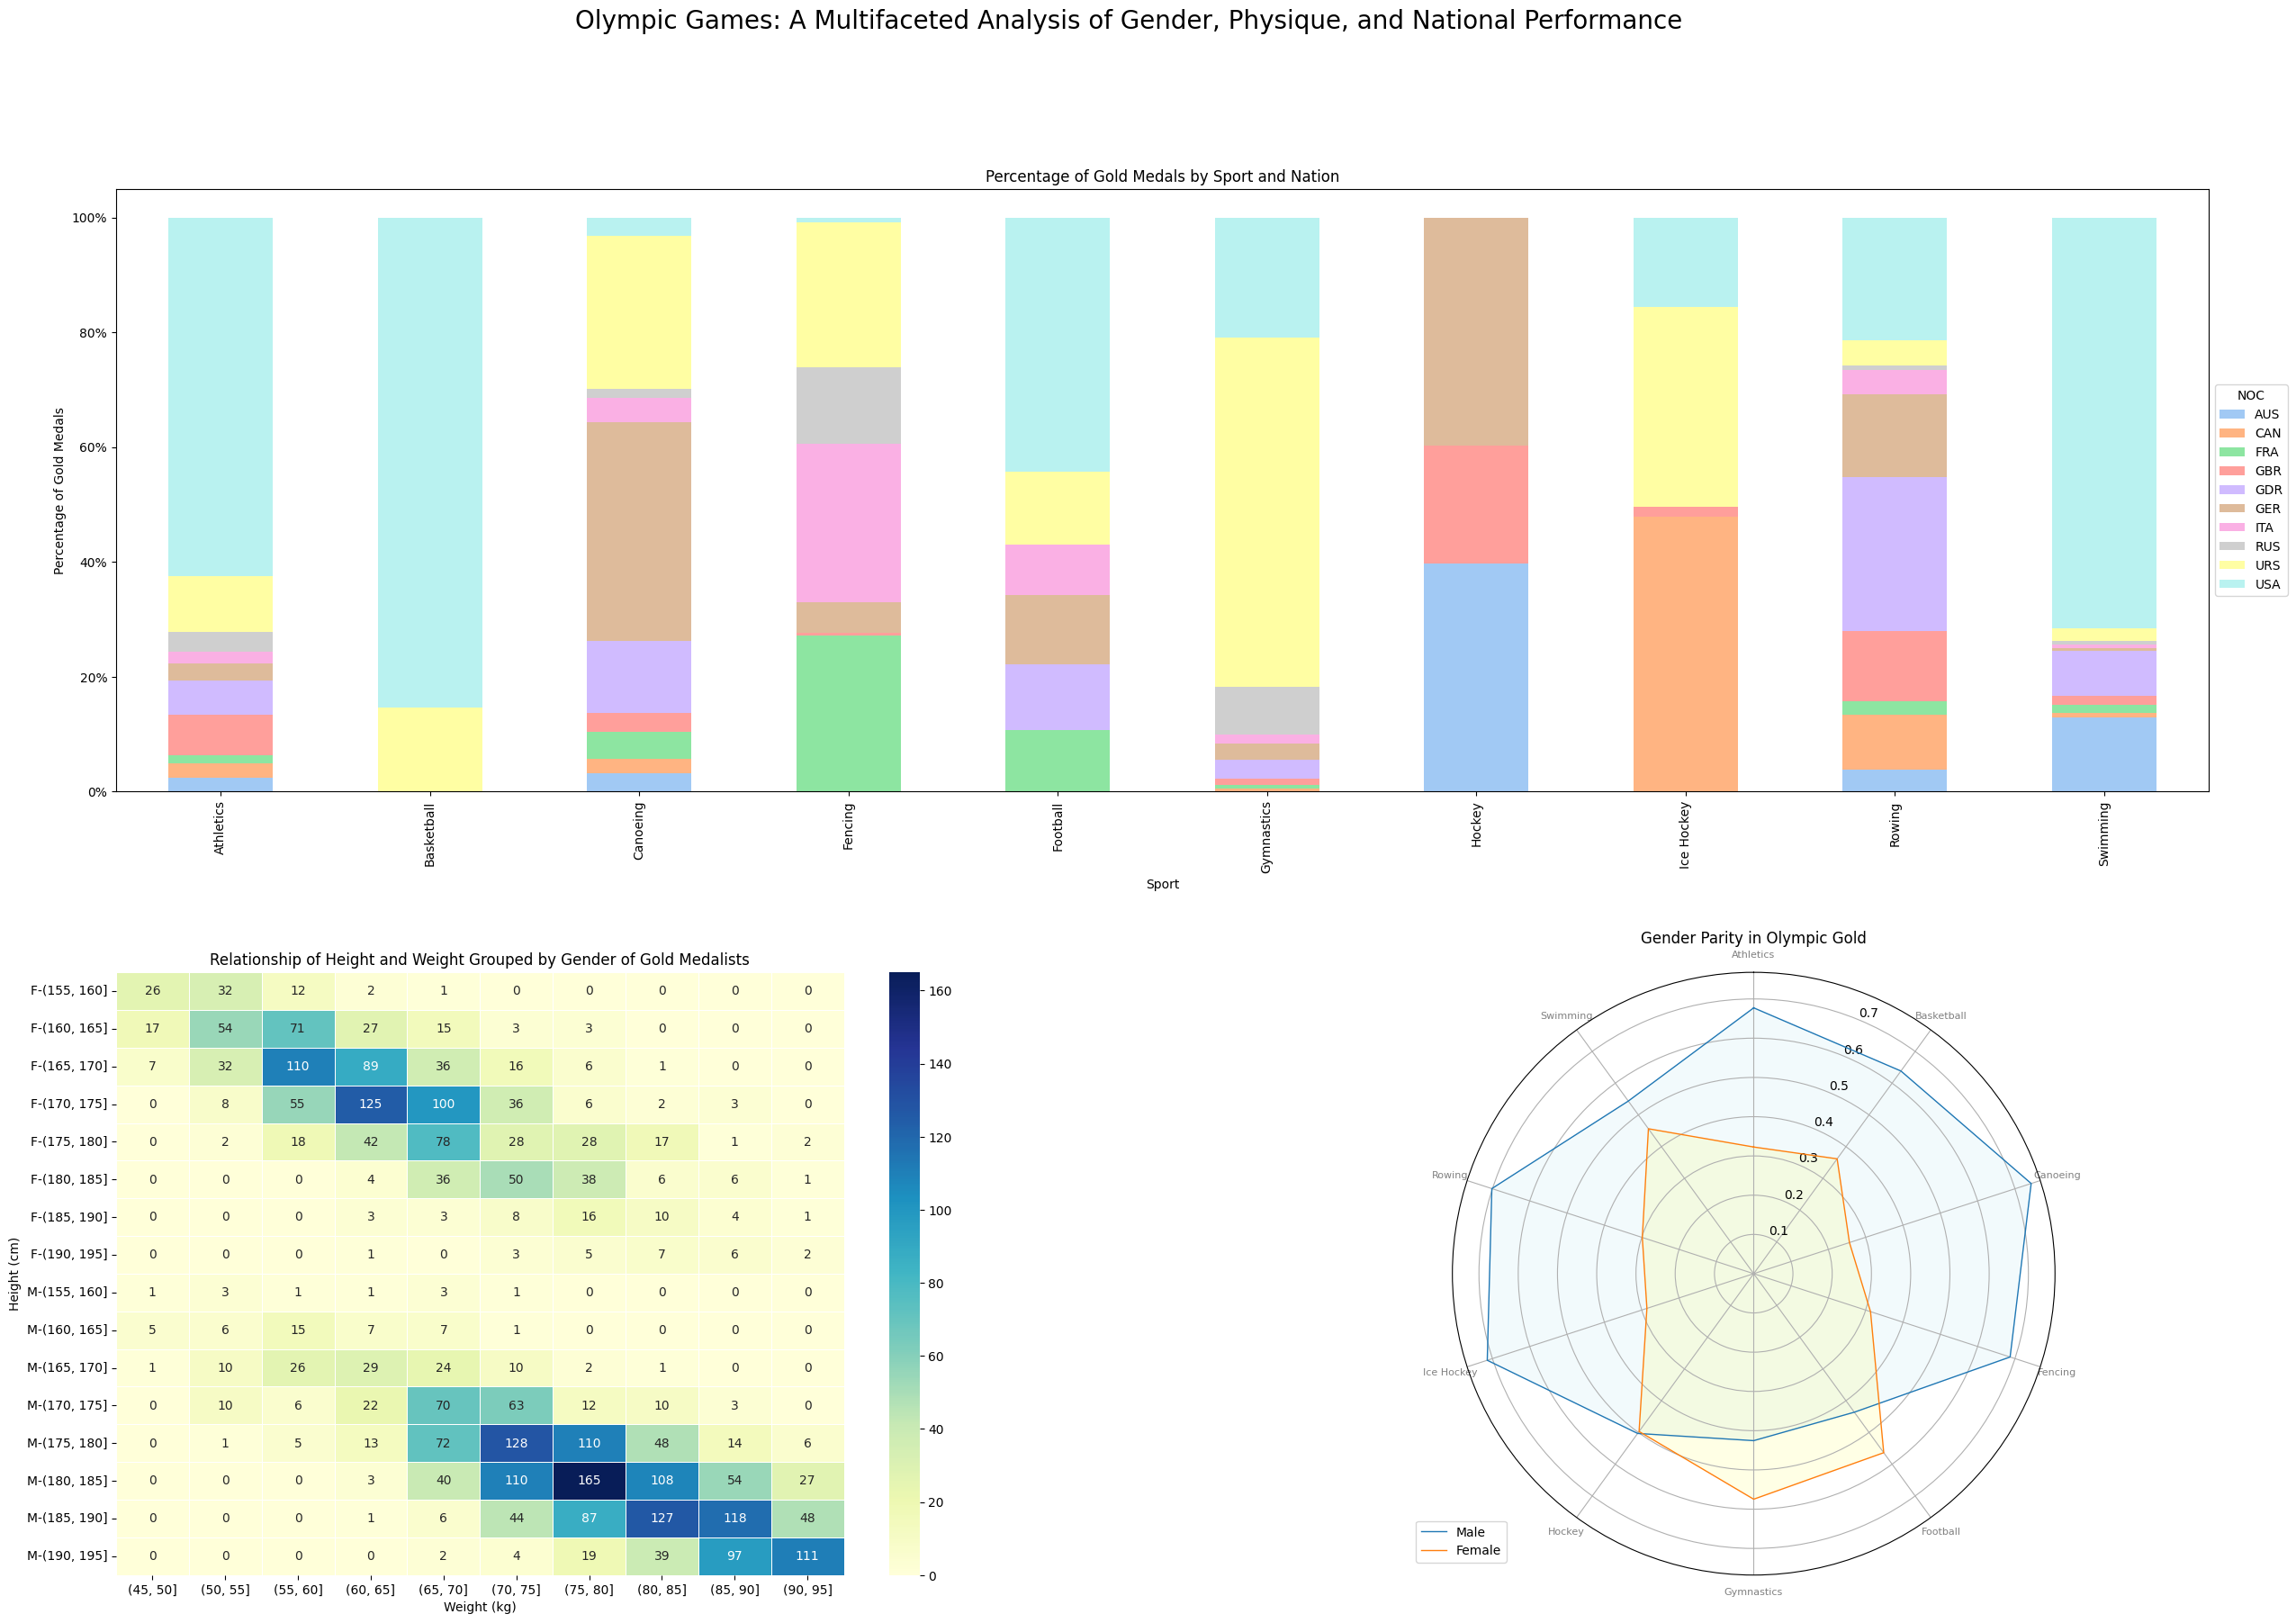

In [188]:
# 创建一个大的图表框架
fig = plt.figure(figsize=(30, 20))

# 添加主图
main_ax = fig.add_subplot(211)  # 第一行第一列
colors = sns.color_palette("pastel", n_colors=len(top_10_countries_noc))
df_percentage.plot(kind='bar', stacked=True, color=colors, ax=main_ax)
main_ax.yaxis.set_major_formatter(mticker.PercentFormatter())
main_ax.set_xlabel('Sport')
main_ax.set_ylabel('Percentage of Gold Medals')
main_ax.set_title('Percentage of Gold Medals by Sport and Nation')
main_ax.legend(title='NOC', loc='center left', bbox_to_anchor=(1.0, 0.5))


# 添加第一个边栏子图
side_ax1 = fig.add_subplot(223)  # 第一行第二列
n_colors = 300
colors = sns.color_palette("YlGnBu", n_colors)
custom_cmap = ListedColormap(colors)
sns.heatmap(heatmap_data, cmap=custom_cmap, annot=True, fmt='g', linewidths=0.5, ax=side_ax1)
side_ax1.set_title('Relationship of Height and Weight Grouped by Gender of Gold Medalists')
side_ax1.set_xlabel('Weight (kg)')
side_ax1.set_ylabel('Height (cm)')


side_ax2 = fig.add_subplot(224, polar=True)  # 2行，2列，位置4
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
side_ax2.set_theta_offset(pi / 2)
side_ax2.set_theta_direction(-1)
side_ax2.set_xticks(angles[:-1])
side_ax2.set_xticklabels(categories, color='grey', size=8)
side_ax2.plot(angles, values_male, linewidth=1, linestyle='solid', label='Male')
side_ax2.fill(angles, values_male, 'skyblue', alpha=0.1)
side_ax2.plot(angles, values_female, linewidth=1, linestyle='solid', label='Female')
side_ax2.fill(angles, values_female, 'yellow', alpha=0.1)
side_ax2.set_title('Gender Parity in Olympic Gold')
side_ax2.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle('Olympic Games: A Multifaceted Analysis of Gender, Physique, and National Performance', fontsize=20)
plt.show()